# Práctica 5

In [2]:
clear all
addpath('./Biblioteca')
graphics_toolkit ("gnuplot"); %% Comando solo para jupyter notebooks


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


Para realizar esta práctica necesitas descargar algunos script de Octave que he subido al Aula Virtual. Si no lo has hecho ya, descarga el archivo **Practica5Anadir_Biblioteca.zip**, situado en la carpeta CodigoPracticas de los Recursos del AV. Descomprímelo y guarda su contenido en la carpeta
Biblioteca que debe estar contenida en tu carpeta de trabajo con Octave de tu ordenador personal.

El objetivo general de esta práctica es experimentar en la aproximación de derivadas e integrales, en
casos sencillos. Para ello, en Biblioteca dispones de las funciones siguientes:

* **aproxDeriv3(f,x,h,pos)** devuelve la aproximación de la derivada de una función en un punto mediante el método de evaluación en tres puntos, es decir, mediante el método de interpolación en tres puntos (véase la página 83 de las notas de clase). Requiere cuatro argumentos: la función $f$ a
derivar, el punto x donde aproximar $f'(x)$, el paso _h_ que determina los puntos donde interpolar y, finalmente una cadena de caracteres **pos**: si **pos='i'** se aproxima la derivada evaluando en x, x + _h_ y x + 2 _h_; si **pos='d'** se aproxima evaluando en x − 2 _h_, x − _h_ y x; en cualquier otro caso se utilizan las diferencias centrales (evaluando en x − _h_ y x + _h_).

* **aproxDeriv3Vect(x,y)**. El vector y debe ser el vector de imágenes, es decir $y=f(x)$ (o una simple tabla de puntos, lo que permite aproximar la derivada de una función desconocida). La función devuelve la aproximación de la derivada de $f$ en los puntos del vector x. En la primera y última componentes utiliza la aproximación en tres puntos (como en la función anterior, a izquierda o derecha), en el resto de componentes utiliza la diferencia central. Las componentes de x no tiene que estar equiespaciadas (aunque si no lo están el cálculo puede no tener sentido).

* **aproxSegundaDeriv3(f,x,h)** devuelve la aproximación a la derivada segunda $f''(x)$ utilizando la fórmula $(f(x − h) − 2f (x) + f(x + h))/h^2$ (x puede ser un vector, evaluando simultáneamente en sus componentes).

* **trapecio(f,a,b,N)**, devuelve la aproximación a la integral de una función en un intervalo calculada mediante la regla compuesta del trapecio. Sus argumentos son: la función $f$ a integrar, los extremos del intervalo a y b donde se integra y el número de subintervalos *N* de la regla compuesta.

* **trapecioVect(x,y)**, devuelve la aproximación a la integral mediante la regla del trapecio compuesta. Los argumentos son dos vectores x e y. El vector y debe ser $f(x)$ donde $f$ es la función a integrar. Los extremos de integración serán la primera y la última de las componentes de x, y se espera que estas componentes esté equiespaciadas.

* **simpson(f,a,b,n)**, es lo análogo a **trapecio.m** pero para la regla compuesta de Simpson.

* **simpsonVect(x,y)**, es lo análogo a **trapecioVect.m** pero para la regla compuesta de Simpson: el vector de abscisas x debe tener longitud impar y deben ser abscisas equiespaciadas.

* **gaussLegendreSimple(g,nG)**, calcula una aproximación a la integral de la función $g$ en el intervalo $[−1, 1]$ mediante la regla de Gauss-Legendre en un número de puntos de Gauss dado por el segundo argumento __nG__. Los valores posibles para __nG__ son 1, 2, 3, 4, 5 o 10 (aquellos para los que he incluido
los puntos y pesos de la regla). No es una función para utilizar directamente, en su lugar utiliza la siguiente.

* **gaussLegendre(f,a,b,N,nG)**, calcula una aproximación a la integral de la función f en el intervalo de extremos a y b mediante la regla compuesta de Gauss-Legendre en _N_ subintervalos. El último argumento, **nG**, tiene el mismo significado que el último argumento de **gaussLegendreSimple.m**, que es utilizada por **gaussLegendre.m**.

Antes de utilizar cualquiera de estas funciones, asegúrate de entender qué argumentos espera, su tipo y significado, así como qué salidas produce, su significado, orden y formato.

## Ejercicio 1:

En este ejercicio estudiamos la inestabilidad del proceso de aproximación de derivadas en un ejemplo concreto. En la sección 3.1.3 de las notas de clase ya indicábamos que para valores muy pequeños del paso _h_ el método comienza a mostrar una gran inestabilidad, debido a los errores de redondeo. Aquí vamos a experimentar con el método de aproximación de derivadas más simple:

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}\quad\quad(1)$$

Sabemos que el error en esta aproximación es $− \frac{f''(\xi)}{2}h$, siendo $\xi$ un punto entre x y x+h.

El ejemplo consistirá en aproximar la derivada de la función seno en el punto x = 1.2 y tomaremos como «valor real» de esta derivada el valor que proporciona Octave para cos(1.2), que es $\cos(1.2) = 0.362 357 754 476 674$.

El mayor valor de h que utilizaremos será $10^{−1}$, por tanto acotaremos el error por $\frac{h}{2} \sin(1.21)$ (el
seno es creciente en $[1.2, 1.21]$).

### Apartado a)

Calcula para valores de $h = 10^{−k}$, con $k = 1, 2, . . . , 20$, el cociente **(1)** (para $f(z) = sen(z)$ y $x = 1.2$) y el error absoluto respecto al valor «real». Escribe los valores de salida en forma de tabla ordenada, añadiendo una tercera columna que sea el valor de $\frac{h}{2} \sin(1.21)$. A la vista de los resultados ¿coincide el error esperado con el real? ¿Cómo se comporta el error real?

#### Solución:

In [3]:
clear all

cociente = @(h) (sin(1.2 + h) - sin(1.2)) ./ h;

valor_real = 0.362357754476674; % = cos(1.2)

k = linspace(1, 20, 20);
h = 10 .^(-k);
imagen = cociente(h);
error_abs = abs(imagen - valor_real);
col_3 = (h * sin(1.21)) / 2;
tabla = [imagen' error_abs' col_3']

tabla =

   0.3152   0.0472   0.0468
   0.3577   0.0047   0.0047
   0.3619   0.0005   0.0005
   0.3623   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3624   0.0000   0.0000
   0.3625   0.0001   0.0000
   0.3630   0.0007   0.0000
   0.3664   0.0040   0.0000
   0.4441   0.0817   0.0000
        0   0.3624   0.0000
        0   0.3624   0.0000
        0   0.3624   0.0000
        0   0.3624   0.0000
        0   0.3624   0.0000



### Apartado b)

Ahora vamos a comprobar visualmente cómo evoluciona el error. Para ello realizamos un gráfico con escala logarítmica tanto en las abscisas como en las ordenadas. Para realizar este tipo de gráficos Octave dispone del comando **loglog(x,y,...)** que sigue una sintaxis idéntica a la de **plot**, con los posibles argumentos de forma idéntica.

Realiza entonces un gráfico con escalas logarítmicas que muestre las gráficas, como funciones de _h_, de los errores:

$$e_1(h) := \lvert \frac{\sin(1.2 + h) - \sin(1.2)}{h} - \cos(1.2) \rvert \quad \text{y} \quad e_2(h):= \frac{\sin(1.2)}{2}h$$

(debes enviar al gráfico sólo las coordenadas en los valores utilizados de h).

#### Solución:

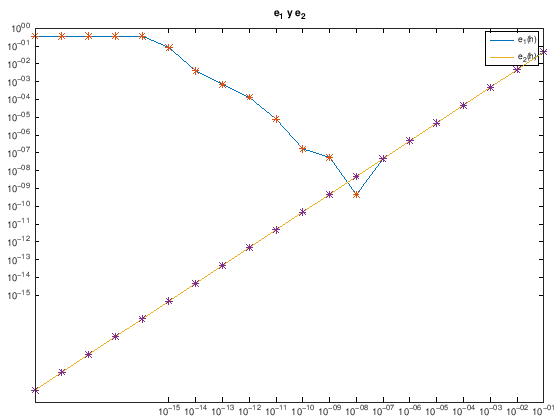

In [4]:
clear all

e1 = @(h) abs(((sin(1.2 + h) - sin(1.2)) ./ h) - cos(1.2));
e2 = @(h) (sin(1.2) / 2) .* h;

k = linspace(1, 20, 20);
h = 10 .^(-k);

figure(1)
loglog(h, e1(h), ';e_1(h);', h, e1(h), '*')
hold on
loglog(h, e2(h), ';e_2(h);', h, e2(h), '*')
title('e_1 y e_2')
hold off


### Apartado c)

En el apartado _3.1.3_ ya citado habíamos realizado un estudio teórico de estos errores en el método de aproximación de las diferencias centrales, encontrando un valor $h_∗$ donde se espera que el error total (por aproximación y redondeo) sea óptimo. Se puede realizar el mismo estudio para el método más simple que nos ocupa (estás invitado a hacerlo...), obteniendo que
el error óptimo en este caso se obtiene para $h_∗ = \sqrt{M_2\varepsilon}$, siendo $M_2$ el máximo de $|f''|$ y $\varepsilon$
una cota del error de redondeo en la evaluación de $f$ . Tomando $M_2 = \sin(1.21)$ y $\varepsilon$ igual al epsilon de la máquina, dibuja sobre el gráfico anterior una línea vertical en la abscisa $h_∗$, ¿se aproxima visualmente a la zona de los menores errores?

#### Solución:



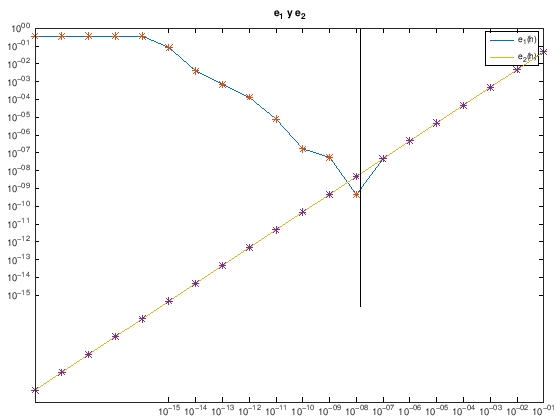

In [5]:
M2 = sin(1.21);
varh = sqrt(M2 * eps);

figure(1)
loglog(h, e1(h), ';e_1(h);', h, e1(h), '*')
hold on
loglog(h, e2(h), ';e_2(h);', h, e2(h), '*')
hold on
line ("xdata",[varh,varh], "ydata",[eps,1], "linewidth", 1)
title('e_1 y e_2')

### Apartado d)

Finalmente: representa en una ventana gráfica las funciones $\cos(x)$ y $\varphi _h(x)$, para distintos valores de $h = 10^{−1}, 10^{−3}, . . . , 10^{−20}$, ambas en el intervalo $[0, \pi]$. La función $\varphi _h(x)$ es el valor aproximado a la derivada de $\sin(x)$ mediante el cociente anterior, es decir:

$$\varphi _h(x) = \frac{\sin(x + h) -\sin(x)}{h}.$$

Añade una segunda ventana que dibuje la gráfica de la aproximación de $\int_0^x f(t)\cdot dt$, para $x \in [0, 10]$. Utiliza distintas reglas de cuadratura para aproximar esta función primitiva. También hay al menos dos estrategias para hacerlo, no distintos métodos de aproximación... sino estrategias para aproximar numéricamente: la integral es aditiva en el intervalo, ¿qué te sugiere esta propiedad?

Utiliza ambas estrategias y compara los resultados calculando la máxima diferencia en $[0, 10]$ y gráficamente.

Para comparar los resultados de la aproximación de integrales con «los valores reales» puedes utilizar las funciones de Octave: **integral(f,a,b)** y **quad(f,a,b)**. Ambas aproximan la integral de $f$ en el intervalo $[a,b]$ utilizando métodos más sofisticados que los que nosotros hemos aprendido hasta ahora.

#### Solución:

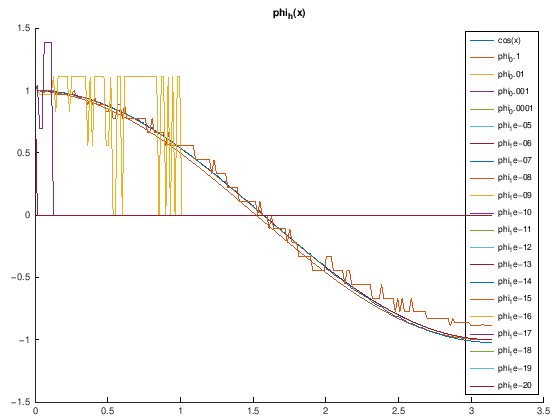

In [6]:
clear all

k = linspace(1, 20, 20);
h = 10 .^(-k);

phi_h = @(y, x) (sin(x+y) -sin(x)) / y;

interval = linspace(0, pi, 200);

figure(1)
hold on
plot(interval, cos(interval), ';cos(x);')
for i=1:length(h)
    plot(interval, phi_h(h(i), interval), sprintf(';phi_%u;', h(i)))
endfor
title('phi_h(x)')



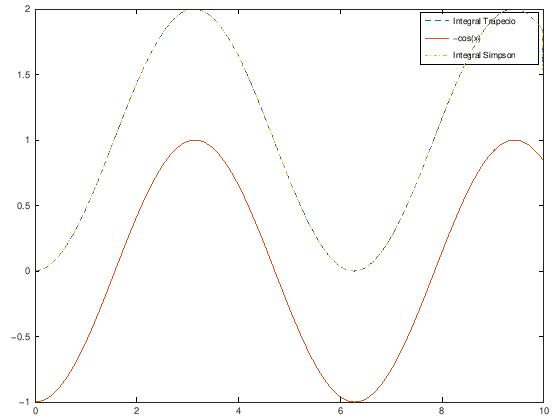

In [13]:
clear all

f = @(z) sin(z);
g = @(z) z * (-2);

n = 10;
subintervalos = 500;

x = linspace(0, 10, 500);

for i=1:length(x)-1
    integral_trap(i) = trapecio(f, x(1), x(i+1), subintervalos);
    integral_simp(i) = simpson(f, x(1), x(i+1), subintervalos);
endfor

integral_trap(length(x)) = -cos(x(length(x)));
integral_simp(length(x)) = -cos(x(length(x)));

plot(x, integral_trap, ';Integral Trapecio;', 'linestyle', '--')
hold on
plot(x, -cos(x), ';-cos(x);')
hold on
plot(x, integral_simp, ';Integral Simpson;', 'linestyle', '-.')

%{
    Vemos que no coinciden exactamente la integral del sen(x) con -cos(x), pero hay que recordar que realmente la integral
    de sen(x) es igual a -cos(x) + C, donde de es una constante. Si quisieramos que ambas gráficas coincidieran del todo
    deberiamos restarle 1 a la integral.
%}

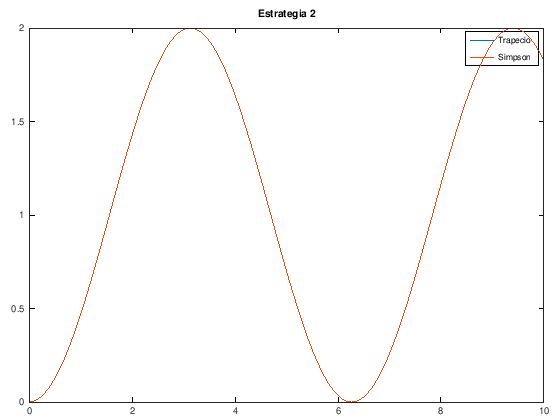

In [18]:
%% Estrategia de aproximación 2

for i=1:length(x)-1
    sumando_trap(i) = trapecio(f, x(i), x(i+1), subintervalos);
    sumando_simp(i) = simpson(f, x(i), x(i+1), subintervalos);
endfor
sumando_trap(length(x)) = 0;
sumando_simp(length(x)) = 0;

function ret = sumatorio(x)
    suma = 0;
    for j=1:length(x)
        suma = suma + x(j);
        total(j) = suma;
    endfor
    ret = total;
endfunction

figure(1)
plot(x, sumatorio(sumando_trap), ';Trapecio;')
hold on
plot(x, sumatorio(sumando_simp), ';Simpson;')
title('Estrategia 2')

## Ejercicio 2

Dibuja en una misma ventana las gráficas de $f(x) = x\cos(x^2)$ en el intervalo $[0, 10]$ y de su derivada $f'(x)$ aproximada mediante el método de los tres puntos.

Añade una segunda ventana que dibuje la gráfica de la aproximación de $\int _{o}^{x}f(t)\cdot dt$, para $x\in [0, 10]$. Utiliza distintas reglas de cuadratura para aproximar esta función primitiva. También hay al menos dos estrategias para hacerlo, no distintos métodos de aproximación... sino estrategias para aproximar numéricamente: la integral es aditiva en el intervalo, ¿qué te sugiere esta propiedad?. Utiliza ambas estrategias y compara los resultados calculando la máxima diferencia en $[0, 10]$ y gráficamente.

Para comparar los resultados de la aproximación de integrales con «los valores reales» puedes utilizar las funciones de Octave: **integral(f,a,b)** y **quad(f,a,b)**. Ambas aproximan la integral de f en el intervalo $[a,b]$ utilizando métodos más sofisticados que los que nosotros hemos aprendido hasta ahora.

### Solución:

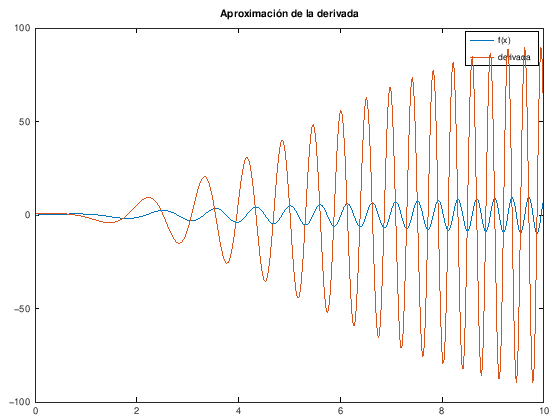

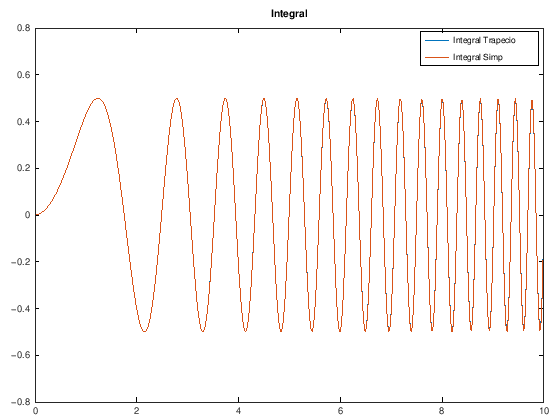

In [12]:
clear all

x = linspace(0, 10, 500);

f = @(x) x .* cos(x.^2);

h = 0.1;

df = aproxDeriv3(f, x, h, j);

figure(1)
plot(x, f(x), ';f(x);')
hold on
plot(x, df, ';derivada;');
title('Aproximación de la derivada')
hold off

%---------------------------------

subintervalos = 500;

for i=1:length(x)-1
    integral_trap(i) = trapecio(f, x(1), x(i+1), subintervalos);
    integral_simp(i) = simpson(f, x(1), x(i+1), subintervalos);
endfor

integral_trap(length(x)) = 0;
integral_simp(length(x)) = 0;

figure(2)
plot(x, integral_trap, ';Integral Trapecio;')
hold on
plot(x, integral_simp, ';Integral Simp;')
title('Integral')
hold off

